# Entropy

- StatQuest Video: https://youtu.be/YtebGVx-Fxw

Entropy is a way to quantify the similarity or difference in a set of things. For example, it can tell us how mixed a group of orange and blue chickens is. Before we can understand Entropy, we must first get an intuitive grasp of Surprise.

Think about what it means to be surprised. You are surprised by events that you didn't expect. If something happens that you were already certain would happen, you feel no surprise at all.

This leads us to a core relationship:
> **Surprise is inversely related to probability.**
> *   An outcome with a **low probability** is highly **surprising**.
> *   An outcome with a **high probability** is **not surprising**.

We need a mathematical formula that behaves exactly like our intuition.

1.  A good first guess is `1 / Probability`. This captures the inverse relationship perfectly: as the probability gets smaller, the result gets larger.
2.  However, there's one problem. For an event that is **certain** (a probability of 1), our feeling of surprise is **zero**. But this formula gives us `1 / 1 = 1`.
3.  To fix this, we use the logarithm function, because `log(1) = 0`. This is the exact property we need!

The final formula for Surprise is:
**`Surprise = log(1 / Probability)`**

*   When the probability is 1 (certainty), the Surprise is `log(1) = 0`.
*   When the probability is very low (an unexpected event), the Surprise is `log(a very large number)`, which results in a high value.

*Note: In information theory, it's customary to use log base 2, but the concept holds for any base.*

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_surprise(probability):
    """Calculates the surprise in bits for a given probability."""
    if type(probability) == float and probability == 0:
        return 0

    # Surprise = log2(1 / p(x))
    return np.log2(1 / probability)

Let's visualize how probability affects surprise. As we can see in the graph below, when an event is certain (probability = 1), there is no surprise. But as the probability decreases, the surprise increases dramatically.

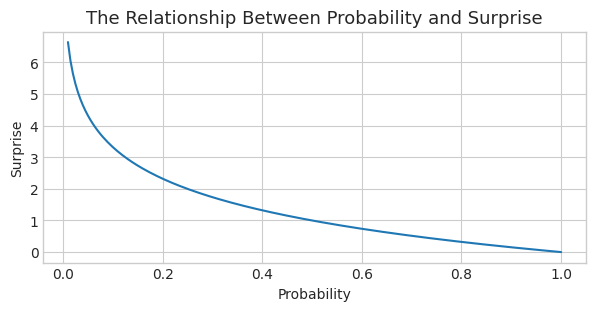

In [ ]:
# We'll start just above 0 to avoid a 'division by zero' error.
probabilities = np.linspace(0.01, 1, 200) # 200 points for a smooth curve

surprise_values = calculate_surprise(probabilities)

# Plot how the probability of an event affects the surprise
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlabel("Probability", fontsize=10)
ax.set_ylabel("Surprise", fontsize=10)
ax.set_title("The Relationship Between Probability and Surprise", fontsize=13)
_ = plt.plot(probabilities, surprise_values)

Now that we can calculate the surprise for any *single* outcome, we can define Entropy.

> **Entropy is the Expected Value of the Surprise.**

In other words, Entropy is the **average amount of surprise** we should expect from a system with multiple possible outcomes. It measures the system's overall uncertainty or unpredictability.

The formula for an Expected Value is a weighted average: $\Sigma (\text{value} \times \text{probability of value})$. For Entropy, our "value" is the Surprise.

$$\text{Entropy} = \Sigma [ \text{Surprise}(x) \times p(x) ]$$

If we substitute our formula for Surprise, we get the most intuitive equation for Entropy:

$$\text{Entropy} = \Sigma [ p(x) \times \log(1 / p(x)) ]$$

*   **Low Entropy:** A system has low entropy if one outcome is highly likely. The average surprise is low because you are rarely surprised. This indicates a "pure" or predictable system.
*   **High Entropy:** A system has high entropy if all outcomes are equally likely. The average surprise is high because you are always uncertain about what will happen next. This indicates a "mixed" or unpredictable system.


In [32]:
def calculate_entropy(probabilities):
    """Calculates the entropy in bits for a given list of probabilities."""
    
    # Entropy = -sum(p(x) * log2(p(x)))
    total_entropy = 0
    for p in probabilities:
        surprise = calculate_surprise(p)
        total_entropy += p * surprise
    
    return total_entropy

In [33]:
probs = [6/7, 1/7]

print(f"Entropy: {calculate_entropy(probs)}")

Entropy: 0.5916727785823275


In [34]:
probs = [1/11, 10/11]

print(f"Entropy: {calculate_entropy(probs)}")

Entropy: 0.4394969869215134


In [35]:
probs = [7/14, 7/14] # Perfectly impure, has an entropy of 1

print(f"Entropy: {calculate_entropy(probs)}")

Entropy: 1.0


In [36]:
probs = [0.0, 1.0] # Perfectly pure, has an entropy of 0

print(f"Entropy: {calculate_entropy(probs)}")

Entropy: 0.0
